# M2608.001300 기계학습 기초 및 전기정보 응용<br> Assignment 1: Logistic Regression

# Setup
Check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn 0.20 or later is installed.

In [1]:
# Python >=3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Dataset load & Plot

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

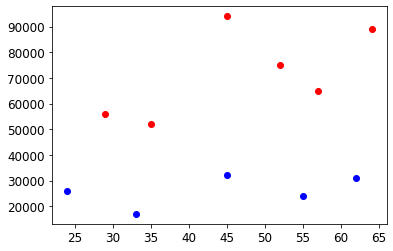

In [3]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

## Problem 1-1. sklearn model로 Logistic Regression 모델 train 시켜보기
scikit-learn library의 LogisticRegression 클래스를 이용해 train 시켜 보세요. <br>
클래스 인자 및 사용법에 관해서는 scikit-learn 홈페이지의 설명을 참고해 주세요. <br>
(참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [4]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std

    clf = LogisticRegression(penalty="none", max_iter=100000).fit(X_normalized, y)
    w = clf.coef_[0] / X_std
    b = (clf.intercept_ - np.sum(clf.coef_[0] * X_mean / X_std))
    
    return w, b

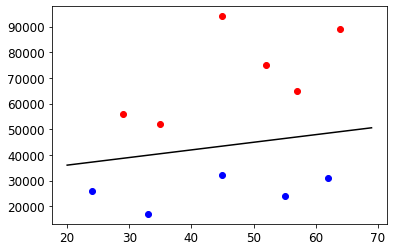

In [5]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. numpy로 Logistic Regression 구현해보기
scikit-learn library를 사용하지 않고 Logistic Regression을 구현해보세요.

In [6]:
def sigmoid(z):
    # YOUR CODE COMES HERE
    result = 1 / (1 + np.exp(-z))
    return result

def binary_cross_entropy_loss(y_pred, target):
    # YOUR CODE COMES HERE
    N = y_pred.size
    target_mask = np.equal(target, 1).astype(int) + 1e-7
    losses = target_mask * np.log(1/y_pred) + (np.ones(N) - target_mask) * np.log(1/(np.ones(N) - y_pred))
    result = np.sum(losses) / N

    return result
    
def learn_and_return_weights_numpy(X, Y, lr=.01, iter=100000):
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    N = Y.shape[0]
    W_iter = np.zeros(3)

    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std
    
    X_with_ones = np.ones((X_normalized.shape[0], X_normalized.shape[1]+1))
    X_with_ones[:, :2] = X_normalized

    for i in range(iter):
        yn_xn = np.array([Y[j] * X_with_ones[j] for j in range(N)])
        dividers = (1 + np.exp(Y * (W_iter @ X_with_ones.T)))

        divided = np.array([yn_xn[j] / dividers[j] for j in range(N)])
        
        dir_to_move = np.sum(divided, axis=0) / N
        W_iter += lr * dir_to_move
    
    W = W_iter[:2] / X_std
    b = -W_iter[2] + np.sum(W_iter[:2] * X_mean / X_std)

    return W, b

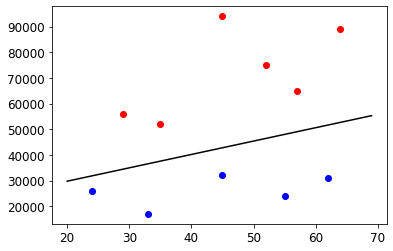

Binary cross entropy loss: 0.15275378371964354


In [7]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)

z = np.dot(X, w) + b
y_output = sigmoid(z)
bce = binary_cross_entropy_loss(y_output,y)
if np.isnan(bce) == True:
    print('You need to make sure your binary cross entropy loss function is correct,\nor add a small number (e.g. 1e-10) to the argument of the logarithm to make sure the argument of the logarithm is not zero.')
else:
    print('Binary cross entropy loss:', bce)

## Problem 2. sklearn model로 Logistic Regression 모델 train 시켜보기 + regularizer 사용하기
scikit-learn library의 Logistic Regression 에 대한 API문서를 읽어보고,<br>
L1-regularization을 사용할 때와 L2-regularization을 사용할 때의 weight의 변화를 살펴보세요. <br>
(참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [8]:
def learn_and_return_weights_l1_regularized(X, y):    
    # YOUR CODE COMES HERE
    
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std

    clf = LogisticRegression(solver="liblinear", penalty="l1", max_iter=100000).fit(X_normalized, y)
    w = clf.coef_[0] / X_std
    b = (clf.intercept_ - np.sum(clf.coef_[0] * X_mean / X_std))
    
    return w, b

def learn_and_return_weights_l2_regularized(X, y):    
    # YOUR CODE COMES HERE
    
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std

    clf = LogisticRegression(solver="liblinear", penalty="l2", max_iter=100000).fit(X_normalized, y)
    w = clf.coef_[0] / X_std
    b = (clf.intercept_ - np.sum(clf.coef_[0] * X_mean / X_std))

    return w, b

In [9]:
def get_dataset():
    D = 1000
    N = 80

    X = np.random.random((N, D))
    w = np.zeros(D)
    w[0] = 1
    w[1] = 1
    
    e = np.random.random(N) - 0.5
    
    y_score = np.dot(X, w)
    y_score_median = np.median(y_score)
    print(y_score.max(), y_score.min(), y_score_median)
    
    # y_score += 0.01 * e
    y = y_score >= y_score_median
    y = y.astype(np.int32)
    
    return (X[:N // 2], y[:N // 2]), (X[N // 2:], y[N // 2:])

In [10]:
(x_train, y_train), (x_test, y_test) = get_dataset()

w_l1, b_l1 = learn_and_return_weights_l1_regularized(x_train, y_train)
w_l2, b_l2 = learn_and_return_weights_l2_regularized(x_train, y_train)

print(w_l1[:5])
print(w_l2[:5])

1.8677107373114585 0.0047317682632627145 0.9027182642152274
[2.49912689 5.27596771 0.         0.         0.        ]
[ 0.45518274  0.52155165 -0.05623419  0.04368465 -0.09781199]


## Problem 3-1. Logistic Regression으로 multi-class classification 하기: API 활용하기
scikit-learn library의 Logistic Regression API를 활용하면 multi-class classification을 간단하게 수행할 수 있습니다.<br>
MNIST dataset에 대해 multi-class classification을 위한 Logistic Regression 모델을 학습시키고, test data에 대한 accuracy를 계산해 보세요.

In [11]:
def get_dataset():
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((-1, 28 * 28)).astype(np.float32)
    x_test = x_test.reshape((-1, 28 * 28)).astype(np.float32)
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = get_dataset()

num_classes = 10

In [12]:
def learn_mul(X, y):
    # YOUR CODE COMES HERE
    lr = LogisticRegression(max_iter=100, multi_class='auto').fit(X, y)

    return lr

def inference_mul(x, lr):
    # YOUR CODE COMES HERE
    y = lr.predict(x)
    
    return y

In [13]:
model = learn_mul(x_train, y_train)
preds = inference_mul(x_test, model)
accuracy = np.sum(preds == y_test) / y_test.shape[0]
print('Accuracy:', accuracy)

Accuracy: 0.9255


## Problem 3-2. Logistic Regression으로 multi-class classification 하기: Transformation to Binary

Logistic Regression은 기본적으로 binary classifier 입니다. 즉, input *X*를 2개의 class로 밖에 분류하지 못합니다.<br>
하지만, 이같은 Logistic Regression 모델을 연달아 사용한다면 data를 여러 class로 분류할 수도 있습니다.<br>
(참고: https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_binary)

MNIST dataset을 이용하여 (class 수) 개의 Binary classifier (Logistic Regression)를 'lrs'의 각 원소에 저장한 뒤,<br>
학습시킨 모델들을 이용하여 test data에 대한 accuracy를 계산해 보세요.<br>
(각 모델의 training iteration은 10회면 충분합니다.)

In [14]:
def learn_mul2bin(X, y):
    lrs = []
    ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n/10%10!=1)*(n%10<4)*n%10::4])
    for i in range(num_classes):
        print('training %s classifier'%(ordinal(i+1)))
        # YOUR CODE COMES HERE
        
        labels = np.equal(y, i).astype(int)
        lr = LogisticRegression(max_iter=10).fit(X, labels)
        lrs.append(lr)

    return lrs

def inference_mul2bin(x, lrs):
    # YOUR CODE COMES HERE
    
    probs = []
    for i in range(num_classes):
        prob = lrs[i].predict_proba([x])
        probs.append(prob[0][1])
    y = probs.index(max(probs))
    
    return y

In [15]:
models = learn_mul2bin(x_train, y_train)
preds = np.array([inference_mul2bin(x, models) for x in x_test])
accuracy = np.sum(preds == y_test) / y_test.shape[0]
print('Accuracy:', accuracy)

training 1st classifier
training 2nd classifier
training 3rd classifier
training 4th classifier
training 5th classifier
training 6th classifier
training 7th classifier
training 8th classifier
training 9th classifier
training 10th classifier
Accuracy: 0.901
